## **Visualize Get Targets functions**

Shape of imgs:  (11, 2, 112040)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)
Shape of s1:  (257, 438)
Shape of s2:  (257, 438)


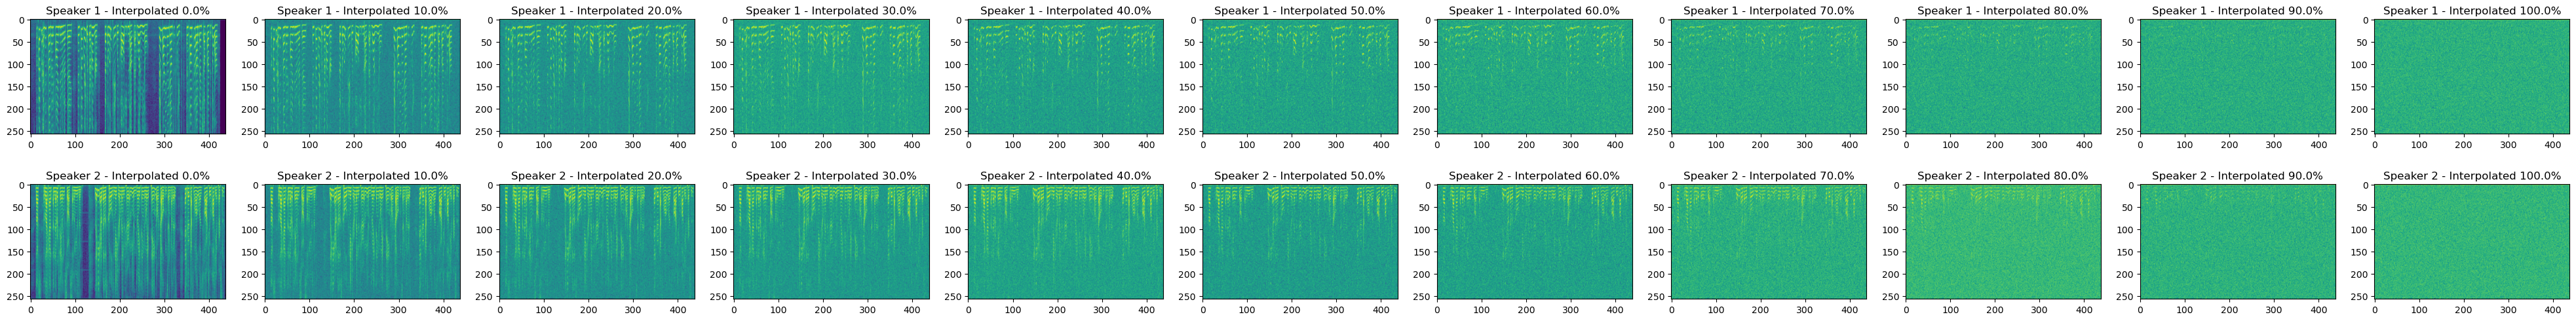

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch 

# Load the numpy file of shape [11, 2, T]
imgs = np.load('visualize.npy')

print("Shape of imgs: ", imgs.shape)
fig, axs = plt.subplots(2, 11, figsize=(50, 6))
for i in range(11):
    # Convert s1 and s2 to dB after STFT 

    s1 = imgs[i, 0]
    s2 = imgs[i, 1]
    
    s1 = torch.stft(torch.tensor(s1), n_fft=512, hop_length=256, win_length=512, window=torch.hann_window(512), return_complex=False).pow(2).sum(-1).numpy()
    s2 = torch.stft(torch.tensor(s2), n_fft=512, hop_length=256, win_length=512, window=torch.hann_window(512), return_complex=False).pow(2).sum(-1).numpy()
    
    # Convert s1, s2 to STFT magnitude in dB
    
    s1 = 10 * np.log10(s1 + 1e-6)
    s2 = 10 * np.log10(s2 + 1e-6)

    print("Shape of s1: ", s1.shape)    
    print("Shape of s2: ", s2.shape)
    axs[0, 10-i].imshow(s1)
    axs[1, 10-i].imshow(s2)

    axs[0, 10-i].set_title(f'Speaker 1 - Interpolated {100 - i/0.1}%')
    axs[1, 10-i].set_title(f'Speaker 2 - Interpolated {100 - i/0.1}%')